# Measuring BinomialHeap's Merge operation with more data

In [1]:
import random
from BinomialHeap import BinomialHeap
from matplotlib import pyplot as plt

### Generating keys from size 1Mil to 8Mil of unique random 128bits to txt files

In [2]:
list_sizes = [1000000, 2000000, 3000000, 4500000, 6000000, 8000000]
hash_dict = {}
for size in list_sizes:
    with open("./cles_big/random" + str(size) + ".txt", "w") as f:
        for i in range(size):
            key = hex(random.getrandbits(128))
            while key in hash_dict:
                key = hex(random.getrandbits(128))
            hash_dict[key] = True
            f.write(str(key) + "\n")
    f.close()
        

In [3]:
from readKeys import readKeysFromCSV
import timeit

### Test Function

In [4]:
def union_test():
    times = []
    for size in list_sizes:
        keys = readKeysFromCSV("./cles_big/random" + str(size) + ".txt")
        heap1 = BinomialHeap()
        heap1.createBinomialHeap(keys[:size//2])
        heap2 = BinomialHeap()
        heap2.createBinomialHeap(keys[size//2:])
        times.append(timeit.timeit(lambda: heap1.mergeHeap(heap2), number=1))
    return times
        
        

### Test Result

In [5]:
union_time = union_test()
union_time

[4.190000254311599e-05,
 4.1700001020217314e-05,
 6.030000076862052e-05,
 6.470000153058209e-05,
 8.490000254823826e-05,
 0.0006624000016017817]

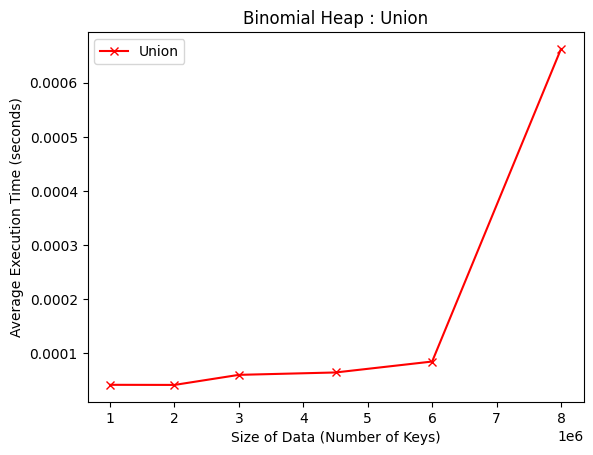

In [6]:
plt.plot(list_sizes, union_time, label="Union",
         marker='x', linestyle='-', color='r')
plt.xlabel('Size of Data (Number of Keys)')
plt.ylabel('Average Execution Time (seconds)')
plt.legend()
plt.title('Binomial Heap : Union')
plt.show()
